In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

import networkx as nx

In [2]:
# Load connectome
cc = np.loadtxt('dati/RSN/RSN_matrix.txt')
cc.shape

(66, 66)

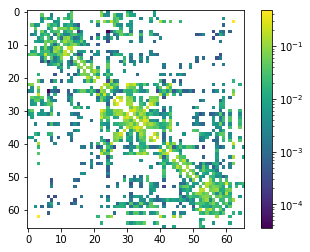

In [3]:
plt.imshow(cc, norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.show()

In [4]:
# create Networkx object
G = nx.from_numpy_matrix(cc)

In [5]:
counts = nx.degree_histogram(G)
degree = range(len(counts))

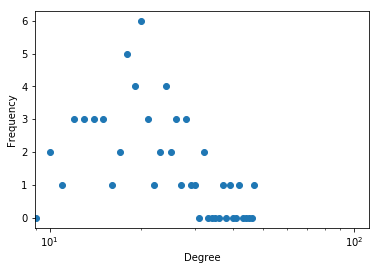

In [6]:
plt.xscale('log')
#plt.yscale('log')
plt.scatter(degree, counts)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

In [7]:
centr = nx.degree_centrality(G)
centr = np.mean(np.array(list(centr.values())))
centr

0.3067599067599067

In [8]:
# total number of vertices n
# total number of edges m
# percentage of present edges p
# mean degree z
# mean vertex–vertex distance l
# clustering coefficient C
headers = ['n', 'm', 'p', 'z', 'l', 'C']

n = nx.number_of_nodes(G)

m = nx.number_of_edges(G)

p = m / n / (n-1)

degrees = dict(G.degree())
z = sum(degrees.values()) / n

l = nx.average_shortest_path_length(G)

C = nx.clustering(G, weight=None)
C = sum(C.values()) / n

values = [n, m, p, z, l, C]

In [9]:
pd.DataFrame([values], columns=headers)

,n,m,p,z,l,C
0,66,658,0.15,19.94,1.76,0.60


In [10]:
weights = np.triu(cc, 1).flatten()
weights = weights[weights!=0.]

In [11]:
hist, bins = np.histogram(weights, bins=20)
hist = hist / np.sum(hist)
bin_centers = (bins[1:]+bins[:-1])*0.5

In [12]:
hist

array([0.63677812, 0.13677812, 0.08054711, 0.03647416, 0.02735562,
       0.0212766 , 0.00759878, 0.01367781, 0.00911854, 0.0106383 ,
       0.00759878, 0.00303951, 0.00303951, 0.00151976, 0.00151976,
       0.00151976, 0.        , 0.        , 0.        , 0.00151976])

In [13]:
from sklearn.linear_model import LinearRegression

rej = 6

x = np.log10(bin_centers[hist!=0][:-rej]).reshape(-1, 1)
y = np.log10(hist[hist!=0][:-rej]).reshape(-1, 1)

model = LinearRegression().fit(x, y)
m = model.coef_[0][0]
q = model.intercept_[0]
print('m =',m,', q =',q)

m = -1.4971602497195 , q = -3.0389681144707392


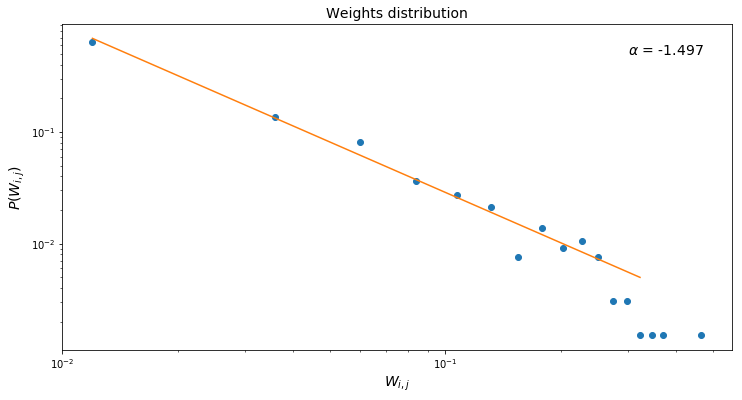

In [18]:
plt.figure(figsize=(12,6))
plt.xscale('log')
plt.yscale('log')

plt.plot(bin_centers, hist, 'o')
plt.plot(bin_centers[:-rej], 10**(m*np.log10(bin_centers[:-rej]) + q) )

plt.xlabel(r'$W_{i,j}$', size=14)
plt.ylabel(r'$P(W_{i,j})$', size=14)
plt.title('Weights distribution', size=14)

plt.text(0.3, 0.5, r'$\alpha$ = '+str(np.round(m,3)), size=14 )

plt.show()